# Análise Exploratória de Dados (EDA) - URLifeguard 🛡️

Este notebook explora o dataset de URLs maliciosas para entender a distribuição das classes e características das strings.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

# Configuração para gráficos bonitos
sns.set(style="whitegrid")
%matplotlib inline

## 1. Exploração Inicial

In [ ]:
# Carregamento
df = pd.read_csv("../data/malicious_phish.csv")

# A. Dimensões: Quantas linhas e colunas temos?
print(f"Dimensões do Dataset: {df.shape}") 
# Ex: (651191, 2) - Se tiver poucas linhas, Deep Learning pode não funcionar bem.

# B. Tipos de Dados e Integridade: As colunas estão no formato certo?
print("\n--- Informações Gerais ---")
df.info() 
# Verifique se a coluna 'url' é 'object' (string) e se 'type' é 'object' ou 'int'.
# Isso também mostra o uso de memória, importante se o dataset for gigante.

# C. Checagem de Nulos (Missing Values): Existem buracos nos dados?
print("\n--- Valores Nulos por Coluna ---")
print(df.isnull().sum())
# Se houver nulos na coluna 'url', seu código de tokenização vai quebrar (crash).
# Se houver, use: df.dropna(inplace=True)

# D. Checagem de Duplicatas: Existem URLs repetidas?
duplicates = df.duplicated().sum()
print(f"\n--- Linhas Duplicadas ---")
print(f"Total de duplicatas: {duplicates}")
# Duplicatas vazam dados do treino para o teste (data leakage), inflando falsamente a acurácia.

# E. Visualização das primeiras amostras (agora sim faz sentido)
display(df.head())

Dimensões do Dataset: (651191, 2)

--- Informações Gerais ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB

--- Valores Nulos por Coluna ---
url     0
type    0
dtype: int64

--- Linhas Duplicadas ---
Total de duplicatas: 10066


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


## 2. Distribuição das Classes
Vamos ver quantas URLs são benignas vs. maliciosas.

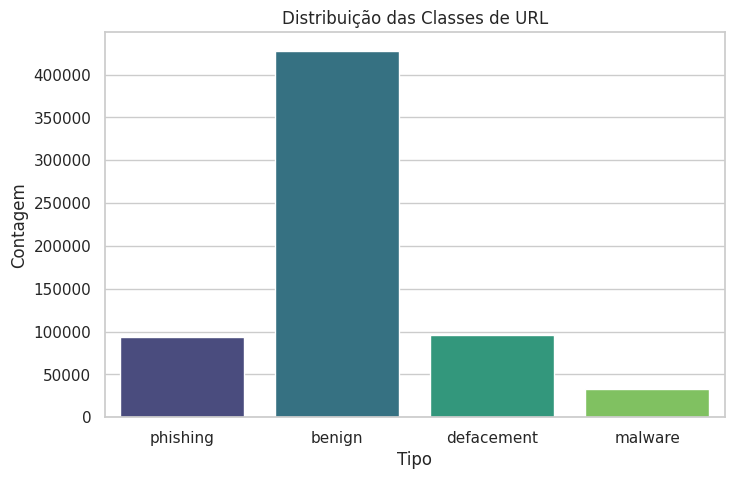

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64


In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df, palette='viridis', hue='type', legend=False)
plt.title('Distribuição das Classes de URL')
plt.xlabel('Tipo')
plt.ylabel('Contagem')
plt.show()

# Contagem numérica
print(df['type'].value_counts())

## 3. Análise do Comprimento da URL
Será que URLs maliciosas tendem a ser mais longas?

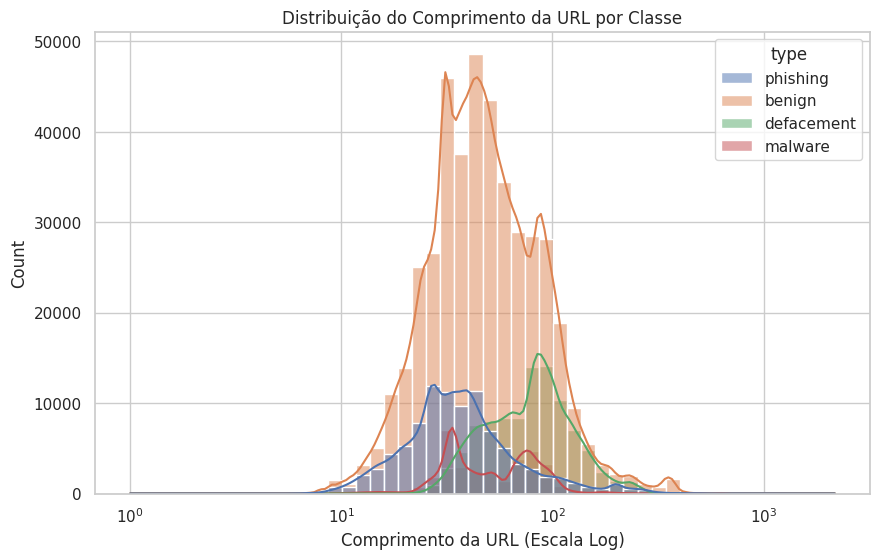

In [7]:
# Criar coluna de comprimento
df['url_len'] = df['url'].apply(lambda x: len(str(x)))

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='url_len', hue='type', kde=True, bins=50, log_scale=(True, False))
plt.title('Distribuição do Comprimento da URL por Classe')
plt.xlabel('Comprimento da URL (Escala Log)')
plt.show()

## 4. Caracteres Especiais
Contagem de caracteres suspeitos como '@', '%', '?'.

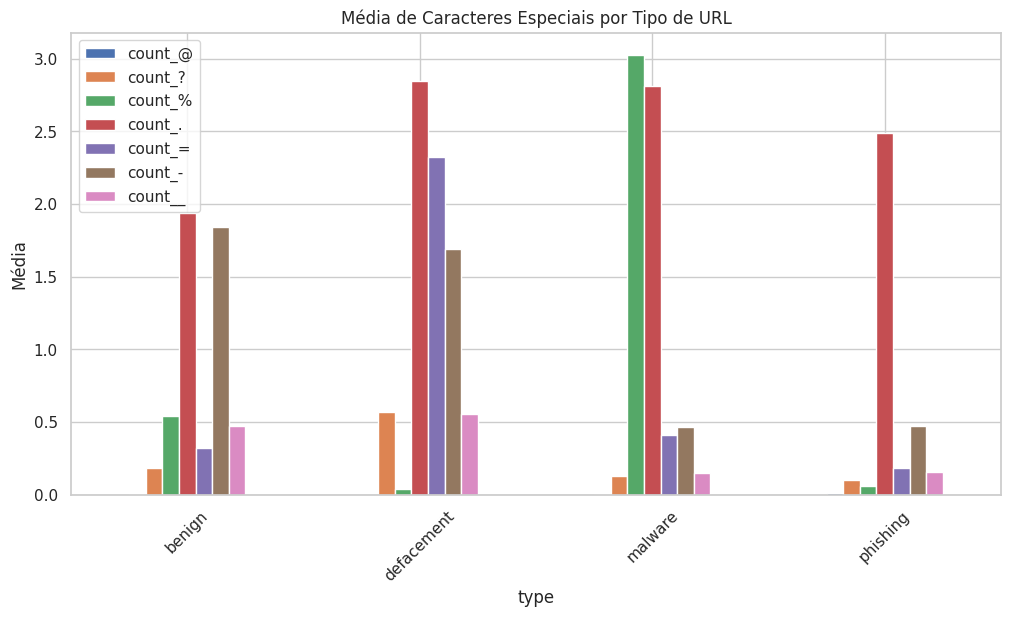

In [8]:
special_chars = ['@', '?', '%', '.', '=', '-', '_']

for char in special_chars:
    df[f'count_{char}'] = df['url'].apply(lambda x: str(x).count(char))

# Visualizar a média desses caracteres por tipo
features = [f'count_{c}' for c in special_chars]
df.groupby('type')[features].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Média de Caracteres Especiais por Tipo de URL')
plt.ylabel('Média')
plt.xticks(rotation=45)
plt.show()